## Forex data feature engineering

In [ ]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(""), os.pardir)))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data.forex import (
    FOREX_DATA_PATH,
    FOREX_COLS,
    ForexDataSource,
    load_processed_forex_data
)

In [3]:
PAIRS = [
    'AUDJPY',
    'AUDUSD',
    'CHFJPY',
    'EURCAD',
    'EURCHF',
    'EURGBP',
    'EURJPY',
    'EURUSD',
    'GBPCHF',
    'GBPJPY',
    'GBPUSD',
    'NZDJPY',
    'NZDUSD',
    'USDCAD',
    'USDCHF',
    'USDJPY'    
]

### "Financial Trading as a Game: A Deep Reinforcement Learning Approach" Paper:
* Sin encoding of minute, hour and weekday
* 8 most recent close price log returns for each of the pairs, normalized with period of 96 and clipped by 10

In [4]:
RECENT_RETURNS = 8

In [5]:
eurusd_df = load_processed_forex_data(ForexDataSource.FOREXTESTER, ['EURUSD'], version='Agg')['EURUSD']

In [6]:
eurusd_df.drop(['<OPEN>', '<HIGH>', '<LOW>'], axis=1, inplace=True)

In [7]:
eurusd_df['<MIN SIN>'] = np.sin(2 * np.pi * eurusd_df['<DT>'].dt.minute / 60).astype(np.float32)
eurusd_df['<HOUR SIN>'] = np.sin(2 * np.pi * eurusd_df['<DT>'].dt.hour / 24).astype(np.float32)
eurusd_df['<WEEKDAY SIN>'] = np.sin(2 * np.pi * eurusd_df['<DT>'].dt.weekday / 7).astype(np.float32)

<AxesSubplot:>

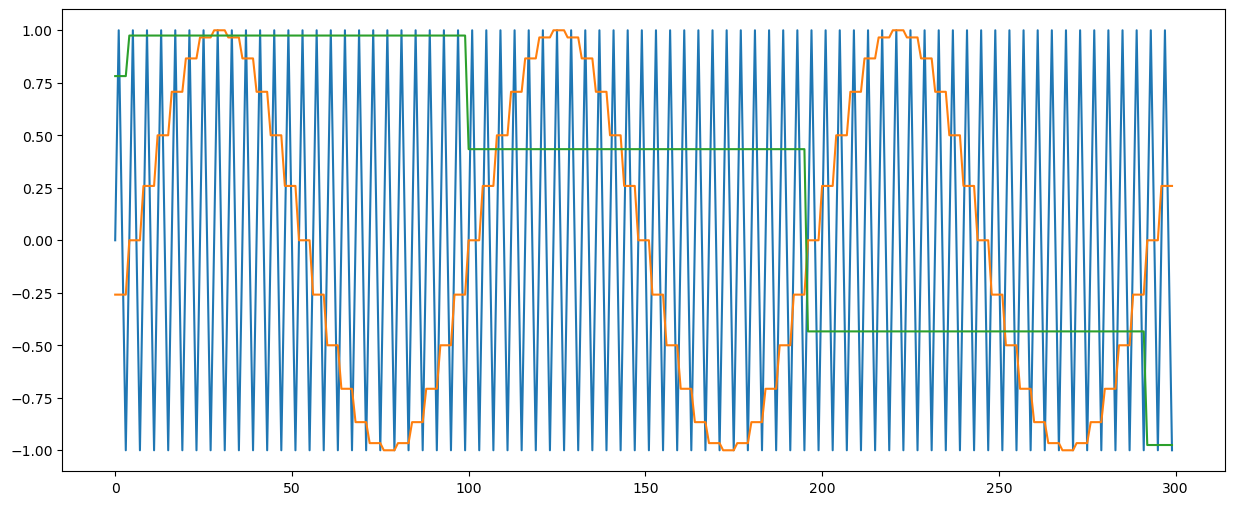

In [8]:
plt.figure(figsize=(15,6))
eurusd_df[:300]['<MIN SIN>'].plot(label='Minute sin')
eurusd_df[:300]['<HOUR SIN>'].plot(label='Hour sin')
eurusd_df[:300]['<WEEKDAY SIN>'].plot(label='Weekday sin')

In [9]:
log_returns = np.log(eurusd_df['<CLOSE>'] / eurusd_df['<CLOSE>'].shift(1)).reset_index(drop=True)
for i in range(0, RECENT_RETURNS):
    eurusd_df[f'<CLOSE RECENT RETURN {i+1}>'] = log_returns.shift(i + 1)

In [10]:
eurusd_df

,<DT>,<CLOSE>,<MIN SIN>,<HOUR SIN>,<WEEKDAY SIN>,<CLOSE RECENT RETURN 1>,<CLOSE RECENT RETURN 2>,<CLOSE RECENT RETURN 3>,<CLOSE RECENT RETURN 4>,<CLOSE RECENT RETURN 5>,<CLOSE RECENT RETURN 6>,<CLOSE RECENT RETURN 7>,<CLOSE RECENT RETURN 8>
0,2001-01-02 23:00:00,0.9507,0.000000e+00,-0.258819,0.781832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-02 23:15:00,0.9507,1.000000e+00,-0.258819,0.781832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-02 23:30:00,0.9508,5.665539e-16,-0.258819,0.781832,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-01-02 23:45:00,0.9506,-1.000000e+00,-0.258819,0.781832,0.000105,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-03 00:00:00,0.9506,0.000000e+00,0.000000,0.974928,-0.000210,0.000105,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
762315,2022-09-30 17:45:00,0.9798,-1.000000e+00,-0.965926,-0.433884,0.000816,-0.000204,-0.001326,0.000510,0.000408,0.000102,0.000204,0.000408
762316,2022-09-30 18:00:00,0.9807,0.000000e+00,-1.000000,-0.433884,-0.000408,0.000816,-0.000204,-0.001326,0.000510,0.000408,0.000102,0.000204
762317,2022-09-30 18:15:00,0.9805,1.000000e+00,-1.000000,-0.433884,0.000918,-0.000408,0.000816,-0.000204,-0.001326,0.000510,0.000408,0.000102
762318,2022-09-30 18:30:00,0.9800,5.665539e-16,-1.000000,-0.433884,-0.000204,0.000918,-0.000408,0.000816,-0.000204,-0.001326,0.000510,0.000408


In [11]:
eurusd_df.dropna(inplace=True)

In [12]:
eurusd_df['<CLOSE RECENT RETURN 1>'].describe()

count    7.623110e+05
mean     4.140216e-08
std      5.091382e-04
min     -1.642924e-02
25%     -1.072345e-04
50%      0.000000e+00
75%      1.101433e-04
max      1.581436e-02
Name: <CLOSE RECENT RETURN 1>, dtype: float64

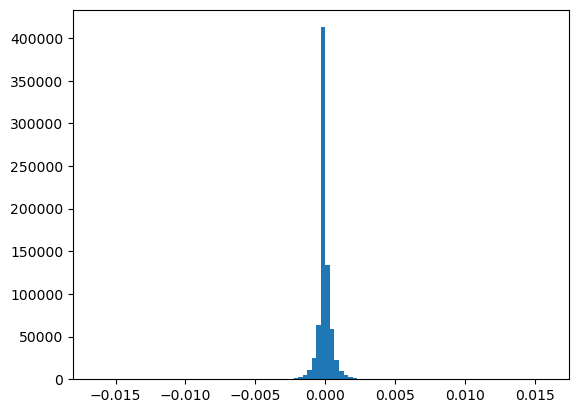

In [13]:
plt.hist(log_returns, bins=100)
plt.show()

In [14]:
log_returns_std_mult = (log_returns[1:] * 1 / np.std(log_returns[1:])).reset_index(drop=True)

In [15]:
np.mean(log_returns_std_mult), np.std(log_returns_std_mult) 

(7.833522e-05, 0.99999994)

In [16]:
log_returns_std_full = ((log_returns[1:] - log_returns[1:].mean()) / log_returns[1:].std()).reset_index(drop=True)

In [17]:
np.mean(log_returns_std_full), np.std(log_returns_std_full) 

(1.3986374e-09, 0.99999934)

In [18]:
log_returns_std_period_96 = log_returns[1:].reset_index(drop=True)

for i in range(len(log_returns[1:]) // 96 + 1):
    
    start_idx = i*96
    end_idx = min((i+1)*96, len(log_returns[1:]))
    
    interval_std = log_returns_std_period_96.iloc[start_idx : end_idx,].std()
    
    log_returns_std_period_96.iloc[start_idx : end_idx,] = (
        log_returns_std_period_96.iloc[start_idx : end_idx,] -
        log_returns_std_period_96.iloc[start_idx : end_idx,].mean()
    ) / (interval_std if interval_std != 0 else 1)

In [19]:
np.mean(log_returns_std_period_96), np.std(log_returns_std_period_96) 

(9.695384e-12, 0.91769165)

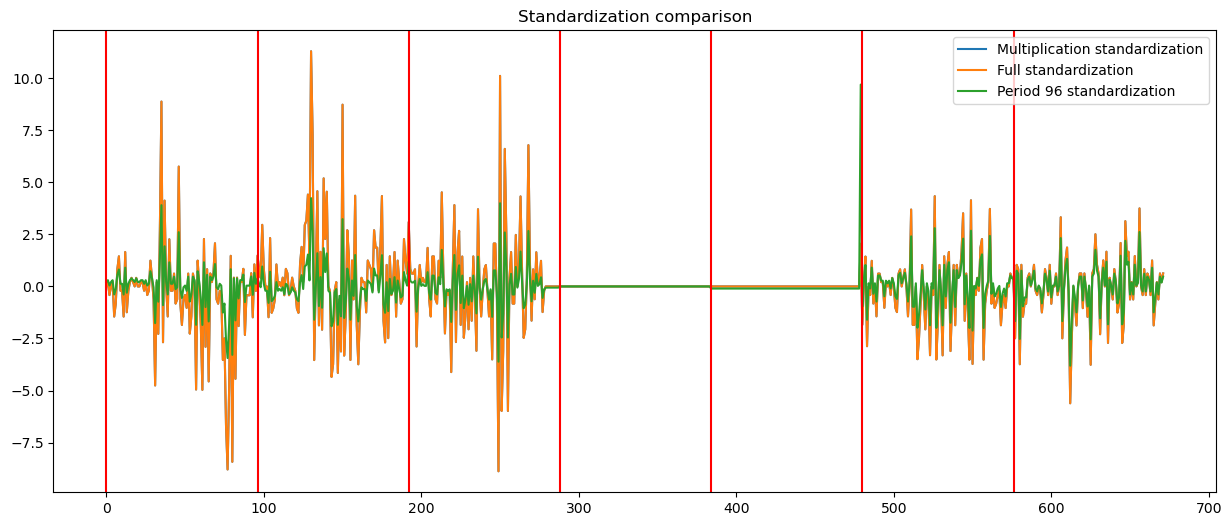

In [20]:
plt.figure(figsize=(15,6))
log_returns_std_mult.iloc[:672].plot(label='Multiplication standardization')
log_returns_std_full.iloc[:672].plot(label='Full standardization')
log_returns_std_period_96.iloc[:672].plot(label='Period 96 standardization')
for i in range(7):
    plt.axvline(x=i*96, color='red')
plt.title('Standardization comparison')
plt.legend()

Text(0.5, 1.0, 'Multiplication - full standardization')

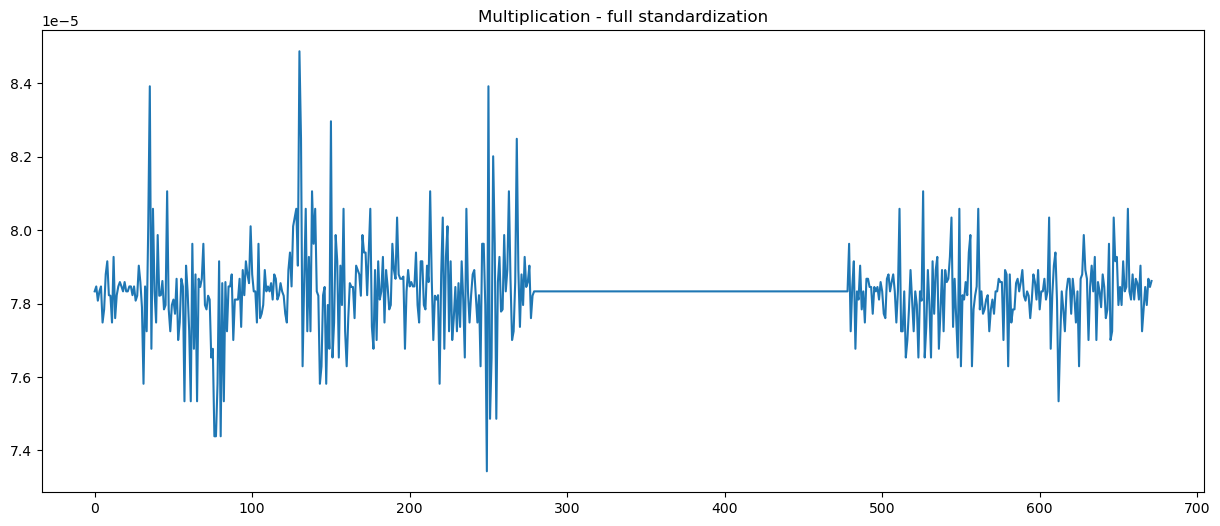

In [21]:
plt.figure(figsize=(15,6))
(log_returns_std_mult-log_returns_std_full).iloc[:672].plot()
plt.title('Multiplication - full standardization')

In [22]:
(log_returns_std_mult-log_returns_std_full).describe()

count    7.623190e+05
mean     7.833417e-05
std      5.730403e-07
min      5.722046e-05
25%      7.821620e-05
50%      7.833497e-05
75%      7.846951e-05
max      9.536743e-05
Name: <CLOSE>, dtype: float64

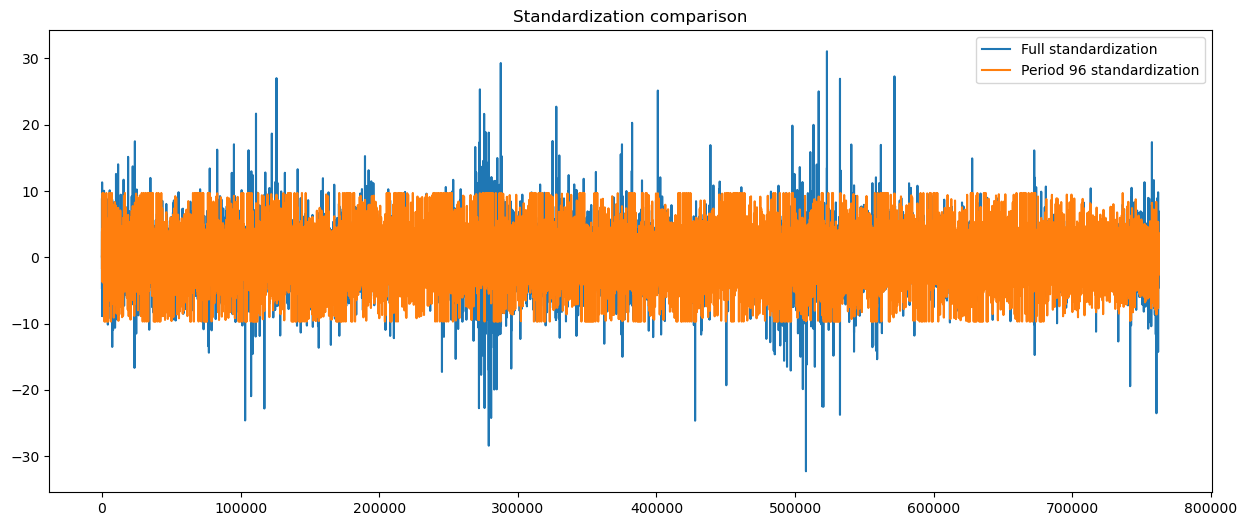

In [23]:
plt.figure(figsize=(15,6))
log_returns_std_full.plot(label='Full standardization')
log_returns_std_period_96.plot(label='Period 96 standardization')
plt.title('Standardization comparison')
plt.legend()

In [24]:
min(log_returns_std_period_96)

-9.695898056030273

In [25]:
max(log_returns_std_period_96)

9.695897102355957

In [26]:
log_returns_std_period_96 = np.clip(log_returns_std_period_96, -10, 10)

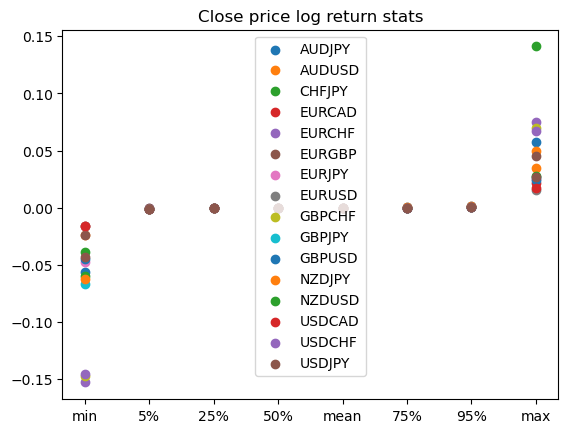

In [27]:
for pair in PAIRS:
    pair_df = load_processed_forex_data(ForexDataSource.FOREXTESTER, [pair], version='Agg')[pair]
    
    log_returns = np.log(pair_df['<CLOSE>'] / pair_df['<CLOSE>'].shift(1)).iloc[1:]
    
    num_stats = pd.Series({
        'min' : np.min(log_returns),
        '5%' : np.quantile(log_returns, 0.05),
        '25%' : np.quantile(log_returns, 0.25),
        '50%' : np.quantile(log_returns, 0.5),
        'mean' : np.mean(log_returns),
        '75%' : np.quantile(log_returns, 0.75),
        '95%' : np.quantile(log_returns, 0.95),
        'max' : np.max(log_returns)
    })
    
    plt.scatter(num_stats.index, num_stats, label=pair)
    
plt.legend(loc='upper center')
plt.title('Close price log return stats')
plt.show()

In [28]:
forex_features_df = pd.DataFrame({'<DT>' : pd.Series(dtype=FOREX_COLS['<DT>'])})

In [29]:
for pair in PAIRS:
    
    pair_df = load_processed_forex_data(ForexDataSource.FOREXTESTER, [pair], version='Agg')[pair]
    pair_df.drop(['<OPEN>', '<HIGH>', '<LOW>'], axis=1, inplace=True)

    pair_df.rename(columns={'<CLOSE>' : f'<{pair} CLOSE>'}, inplace=True)
    
    forex_features_df = forex_features_df.merge(pair_df, on='<DT>', how='outer', suffixes=[None, None])

In [30]:
forex_features_df

,<DT>,<AUDJPY CLOSE>,<AUDUSD CLOSE>,<CHFJPY CLOSE>,<EURCAD CLOSE>,<EURCHF CLOSE>,<EURGBP CLOSE>,<EURJPY CLOSE>,<EURUSD CLOSE>,<GBPCHF CLOSE>,<GBPJPY CLOSE>,<GBPUSD CLOSE>,<NZDJPY CLOSE>,<NZDUSD CLOSE>,<USDCAD CLOSE>,<USDCHF CLOSE>,<USDJPY CLOSE>
0,2001-01-02 23:00:00,64.279999,0.5617,71.540001,1.4195,1.5205,0.6330,108.809998,0.9507,2.4012,171.809998,1.5015,NaN,NaN,1.4928,1.5990,114.410004
1,2001-01-02 23:15:00,64.279999,0.5618,71.470001,1.4193,1.5212,0.6330,108.769997,0.9507,2.4027,171.770004,1.5017,NaN,NaN,1.4928,1.5996,114.379997
2,2001-01-02 23:30:00,64.260002,0.5616,71.500000,1.4193,1.5210,0.6329,108.779999,0.9508,2.4020,171.789993,1.5016,NaN,NaN,1.4928,1.5994,114.389999
3,2001-01-02 23:45:00,64.349998,0.5622,71.510002,1.4189,1.5211,0.6331,108.809998,0.9506,2.4014,171.779999,1.5009,NaN,NaN,1.4924,1.5997,114.430000
4,2001-01-03 00:00:00,64.440002,0.5629,71.519997,1.4189,1.5210,0.6333,108.820000,0.9506,2.4006,171.740005,1.5006,NaN,NaN,1.4925,1.5995,114.440002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762315,2022-09-30 17:45:00,92.529999,0.6393,146.679993,1.3534,0.9665,0.8776,141.800003,0.9798,1.1010,161.539993,1.1163,80.940002,0.5593,1.3812,0.9863,144.710007
762316,2022-09-30 18:00:00,92.589996,0.6396,146.759995,1.3539,0.9672,0.8789,141.990005,0.9807,1.1002,161.509995,1.1156,81.220001,0.5610,1.3804,0.9861,144.759995
762317,2022-09-30 18:15:00,92.589996,0.6395,146.800003,1.3540,0.9667,0.8794,141.960007,0.9805,1.0990,161.369995,1.1147,81.040001,0.5598,1.3809,0.9859,144.759995
762318,2022-09-30 18:30:00,92.529999,0.6390,146.630005,1.3552,0.9675,0.8790,141.899994,0.9800,1.1004,161.389999,1.1146,80.949997,0.5590,1.3829,0.9872,144.779999


In [31]:
na_dt = forex_features_df[pd.isnull(forex_features_df).any(axis=1)]['<DT>']

In [32]:
na_dt

0       2001-01-02 23:00:00
1       2001-01-02 23:15:00
2       2001-01-02 23:30:00
3       2001-01-02 23:45:00
4       2001-01-03 00:00:00
                ...        
69979   2003-01-01 21:45:00
69980   2003-01-01 22:00:00
69981   2003-01-01 22:15:00
69982   2003-01-01 22:30:00
69983   2003-01-01 22:45:00
Name: <DT>, Length: 69984, dtype: datetime64[ns]

In [33]:
forex_features_df = forex_features_df[forex_features_df['<DT>'] > na_dt.iloc[-1]].reset_index(drop=True)

In [34]:
close_price_cols = [col for col in forex_features_df.columns if 'CLOSE' in col]

In [35]:
forex_features_df['<MIN SIN>'] = np.sin(2 * np.pi * forex_features_df['<DT>'].dt.minute / 60).astype(np.float32)
forex_features_df['<HOUR SIN>'] = np.sin(2 * np.pi * forex_features_df['<DT>'].dt.hour / 24).astype(np.float32)
forex_features_df['<WEEKDAY SIN>'] = np.sin(2 * np.pi * forex_features_df['<DT>'].dt.weekday / 7).astype(np.float32)

In [36]:
forex_features_df['<MIN SIN>'].mean(), forex_features_df['<MIN SIN>'].std()

(0.0, 0.7071073)

In [37]:
forex_features_df['<HOUR SIN>'].mean(), forex_features_df['<HOUR SIN>'].std()

(1.7555816e-05, 0.7071055)

In [38]:
forex_features_df['<WEEKDAY SIN>'].mean(), forex_features_df['<WEEKDAY SIN>'].std()

(1.814745e-05, 0.7070544)

In [39]:
for close_price_col in close_price_cols:
    
    log_returns = np.log(forex_features_df[close_price_col] / forex_features_df[close_price_col].shift(1))
    for i in range(0, RECENT_RETURNS):
        forex_features_df[f'<{close_price_col.strip("<>")} RECENT RETURN {i+1}>'] = log_returns.shift(i + 1)
    
    forex_features_df.drop(close_price_col, axis=1, inplace=True)

In [40]:
forex_features_df.dropna(inplace=True)
forex_features_df.reset_index(drop=True, inplace=True)

In [41]:
forex_features_df

,<DT>,<MIN SIN>,<HOUR SIN>,<WEEKDAY SIN>,<AUDJPY CLOSE RECENT RETURN 1>,<AUDJPY CLOSE RECENT RETURN 2>,<AUDJPY CLOSE RECENT RETURN 3>,<AUDJPY CLOSE RECENT RETURN 4>,<AUDJPY CLOSE RECENT RETURN 5>,<AUDJPY CLOSE RECENT RETURN 6>,...,<USDCHF CLOSE RECENT RETURN 7>,<USDCHF CLOSE RECENT RETURN 8>,<USDJPY CLOSE RECENT RETURN 1>,<USDJPY CLOSE RECENT RETURN 2>,<USDJPY CLOSE RECENT RETURN 3>,<USDJPY CLOSE RECENT RETURN 4>,<USDJPY CLOSE RECENT RETURN 5>,<USDJPY CLOSE RECENT RETURN 6>,<USDJPY CLOSE RECENT RETURN 7>,<USDJPY CLOSE RECENT RETURN 8>
0,2003-01-02 01:15:00,1.000000e+00,0.258819,0.433884,0.000599,0.000450,0.000000,-0.000150,-0.000600,0.000000,...,-0.000144,0.000433,0.000253,0.000421,0.000000,0.000169,-0.000927,-0.000168,0.000253,0.000084
1,2003-01-02 01:30:00,5.665539e-16,0.258819,0.433884,0.000749,0.000599,0.000450,0.000000,-0.000150,-0.000600,...,0.000289,-0.000144,0.000084,0.000253,0.000421,0.000000,0.000169,-0.000927,-0.000168,0.000253
2,2003-01-02 01:45:00,-1.000000e+00,0.258819,0.433884,0.000598,0.000749,0.000599,0.000450,0.000000,-0.000150,...,-0.000217,0.000289,0.000337,0.000084,0.000253,0.000421,0.000000,0.000169,-0.000927,-0.000168
3,2003-01-02 02:00:00,0.000000e+00,0.500000,0.433884,0.000598,0.000598,0.000749,0.000599,0.000450,0.000000,...,-0.000361,-0.000217,0.000084,0.000337,0.000084,0.000253,0.000421,0.000000,0.000169,-0.000927
4,2003-01-02 02:15:00,1.000000e+00,0.500000,0.433884,0.000598,0.000598,0.000598,0.000749,0.000599,0.000450,...,-0.000650,-0.000361,0.000421,0.000084,0.000337,0.000084,0.000253,0.000421,0.000000,0.000169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692322,2022-09-30 17:45:00,-1.000000e+00,-0.965926,-0.433884,-0.000324,-0.000648,-0.000863,-0.001185,-0.000323,0.000000,...,0.000508,-0.000406,-0.000553,0.000000,0.000207,0.000138,0.000069,0.000000,0.000069,0.000000
692323,2022-09-30 18:00:00,0.000000e+00,-1.000000,-0.433884,-0.000432,-0.000324,-0.000648,-0.000863,-0.001185,-0.000323,...,-0.000406,0.000508,0.000138,-0.000553,0.000000,0.000207,0.000138,0.000069,0.000000,0.000069
692324,2022-09-30 18:15:00,1.000000e+00,-1.000000,-0.433884,0.000648,-0.000432,-0.000324,-0.000648,-0.000863,-0.001185,...,0.000406,-0.000406,0.000345,0.000138,-0.000553,0.000000,0.000207,0.000138,0.000069,0.000000
692325,2022-09-30 18:30:00,5.665539e-16,-1.000000,-0.433884,0.000000,0.000648,-0.000432,-0.000324,-0.000648,-0.000863,...,0.000913,0.000406,0.000000,0.000345,0.000138,-0.000553,0.000000,0.000207,0.000138,0.000069


In [42]:
forex_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692327 entries, 0 to 692326
Columns: 132 entries, <DT> to <USDJPY CLOSE RECENT RETURN 8>
dtypes: datetime64[ns](1), float32(131)
memory usage: 351.3 MB


In [43]:
forex_features_df.to_pickle(f'{FOREX_DATA_PATH}/Forextester/Processed/Init Features/forex_features.pkl')